# Importing libraries

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import xgboost
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
import matplotlib as mpl
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount = True)

ModuleNotFoundError: No module named 'google'

# Loading the Dataset

In [ ]:
#Loading the dataset
# data = pd.read_csv("/gdrive/My Drive/DASA/final_dataset_eur_without_outliers.csv")
data = pd.read_csv("./data/final_dataset_eur_without_outliers.csv")
data = data.drop(columns = ["Unnamed: 0"])
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 30632


,Crop,N_min,N_max,P_min,P_max,K_min,K_max,Avg_Temp,Rainfall,Productivity,EUR/ha,EUR/kg,Area,Production,Production_kg
0,Arecanut,79,100,28,40,79,140,28.236667,1189.48,2750.000000,14119.607590,5.134403,4.0,11.0,11000.0
1,Arecanut,79,100,28,40,79,140,28.294583,887.11,1750.000000,8985.204830,5.134403,4.0,7.0,7000.0
2,Arecanut,79,100,28,40,79,140,28.545833,788.69,1444.444444,7416.359542,5.134403,18.0,26.0,26000.0
3,Arecanut,79,100,28,40,79,140,28.487500,805.96,722.222222,3708.179771,5.134403,18.0,13.0,13000.0
4,Arecanut,79,100,28,40,79,140,28.289167,1822.37,444.444444,2281.956782,5.134403,9.0,4.0,4000.0


In [ ]:
data.describe()

,N_min,N_max,P_min,P_max,K_min,K_max,Avg_Temp,Rainfall,Productivity,EUR/ha,EUR/kg,Area,Production,Production_kg
count,30632.000000,30632.000000,30632.000000,30632.000000,30632.000000,30632.000000,30632.000000,30632.000000,3.063200e+04,3.063200e+04,30632.000000,30632.000000,3.063200e+04,3.063200e+04
mean,69.079068,165.353846,48.279479,77.556934,71.689247,166.556052,26.084822,1178.790085,3.698977e+04,1.004369e+04,1.679121,4532.816793,9.857387e+04,9.857387e+07
std,55.556031,122.934628,21.572683,42.334731,68.540825,153.449917,1.233055,681.794662,1.351138e+06,2.467437e+05,2.613743,22580.340784,7.616118e+05,7.616118e+08
min,8.000000,10.000000,5.000000,8.000000,0.000000,20.000000,20.491667,34.240000,0.000000e+00,0.000000e+00,0.182557,1.000000,0.000000e+00,0.000000e+00
25%,25.000000,60.000000,28.000000,45.000000,30.000000,60.000000,25.315521,755.730000,7.500000e+02,1.140978e+03,0.228196,41.000000,6.400000e+01,6.400000e+04
50%,60.000000,100.000000,50.000000,67.000000,60.000000,120.000000,26.077500,1013.600000,2.750000e+03,2.738348e+03,0.855734,256.000000,6.600000e+02,6.600000e+05
75%,105.000000,303.000000,60.000000,95.000000,75.000000,220.000000,26.800833,1357.330000,1.300000e+04,6.884147e+03,1.825565,1574.000000,8.755750e+03,8.755750e+06
max,200.000000,400.000000,110.000000,250.000000,515.000000,520.000000,29.852083,5505.020000,8.800000e+07,1.606498e+07,17.114676,884618.000000,3.715800e+07,3.715800e+10


# Data Visualization


*   We analize the distribution of the dataset
*   We make some considerations



Analysis on the distribution

In [ ]:
print("The total number of crops is:\n{}".format(data["Crop"].nunique()))

The total number of crops is:
60


In [ ]:
distinct_crops = data["Crop"].value_counts()
print("The distribution for each crop is:\n{}".format(distinct_crops))

The distribution for each crop is:
Sugarcane                    3665
Onion                        2538
Potato                       2374
Dry chillies                 2330
Turmeric                     2120
Sweet potato                 2034
Garlic                       1850
Coriander                    1835
Banana                       1773
Tobacco                      1213
Dry ginger                    831
Arecanut                      830
Tapioca                       769
Guar seed                     539
Cashewnut                     526
Sesamum                       491
Black pepper                  453
Mango                         234
Papaya                        232
Cotton(lint)                  212
Cardamom                      194
Pome Fruit                    189
Citrus Fruit                  184
Tomato                        179
Brinjal                       157
Sunflower                     150
Groundnut                     148
Arhar/Tur                     141
Bhindi       

In [ ]:
crops = pd.DataFrame(distinct_crops)

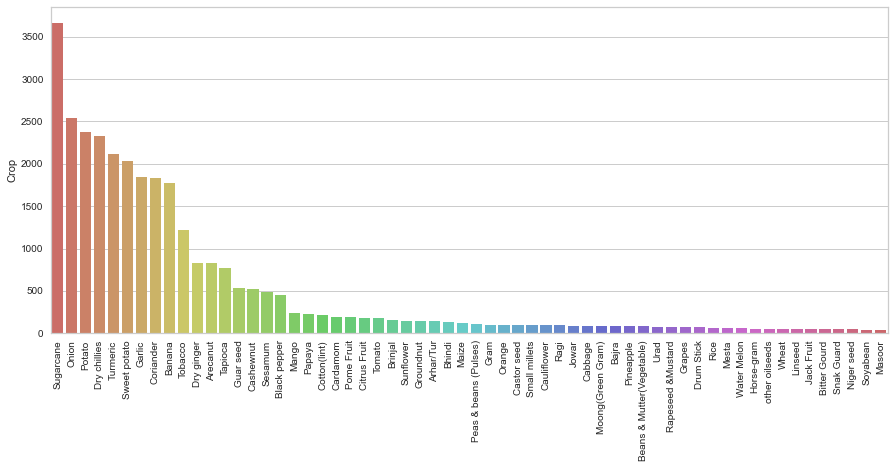

In [ ]:
plt.figure(figsize = (15, 6))
sns.barplot(y ='Crop', x = crops.index, data = crops, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

As we can notice there are crops which has a huge amount of data and other crops with very few rows.

In [ ]:
#To plot the features
#Setting up colors prefrences
pallet = ["black", "blue", "red", "green"]
cmap = sns.color_palette("ch: start = -.7 , rot = -.5", as_cmap = True)

Reletive Plot of All the Features


<Figure size 432x288 with 0 Axes>

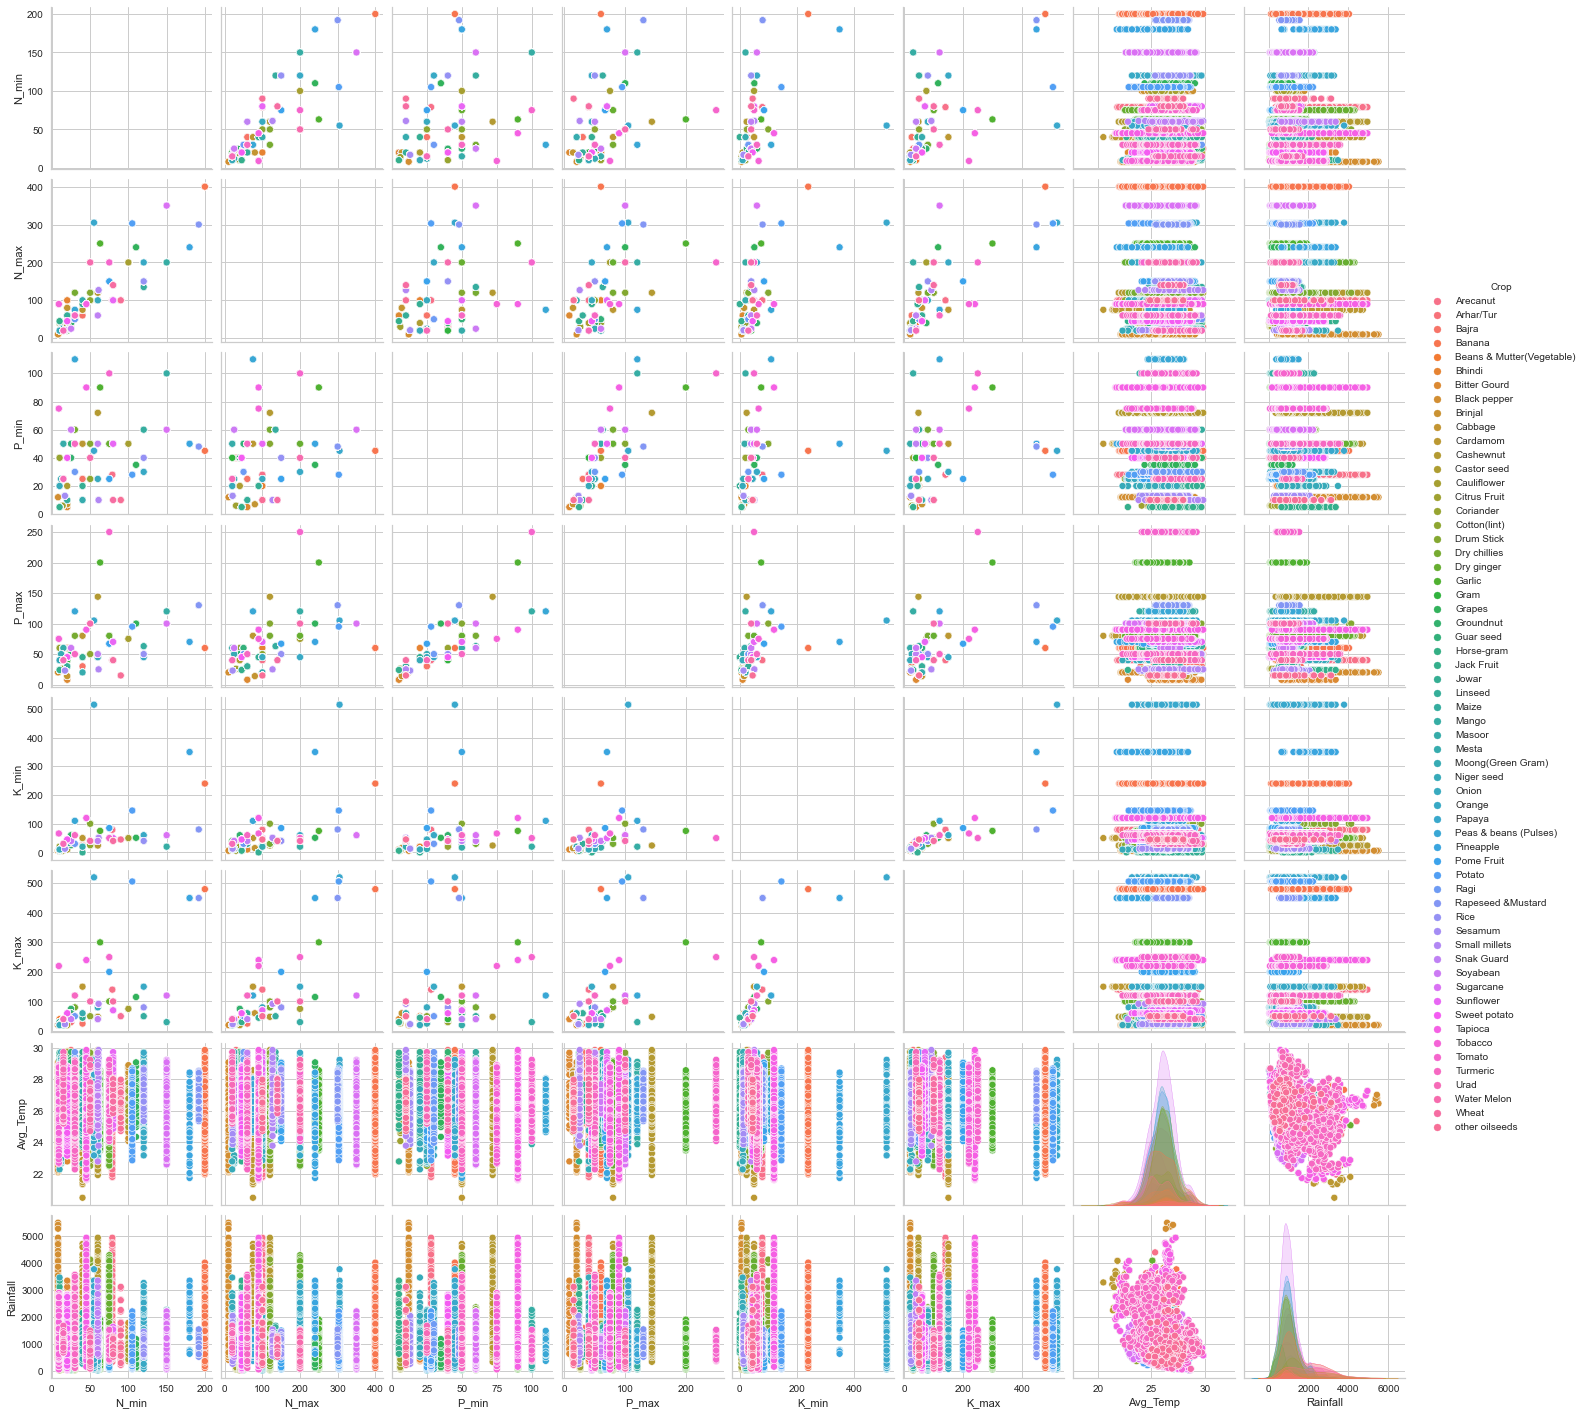

In [ ]:
#Plotting following features
To_Plot = ["N_min", "N_max", "P_min", "P_max", "K_min", "K_max", "Avg_Temp", "Rainfall", "Crop"]
print("Reletive Plot of All the Features")
plt.figure()
sns.pairplot(data[To_Plot], hue = "Crop")
plt.show()

<AxesSubplot: >

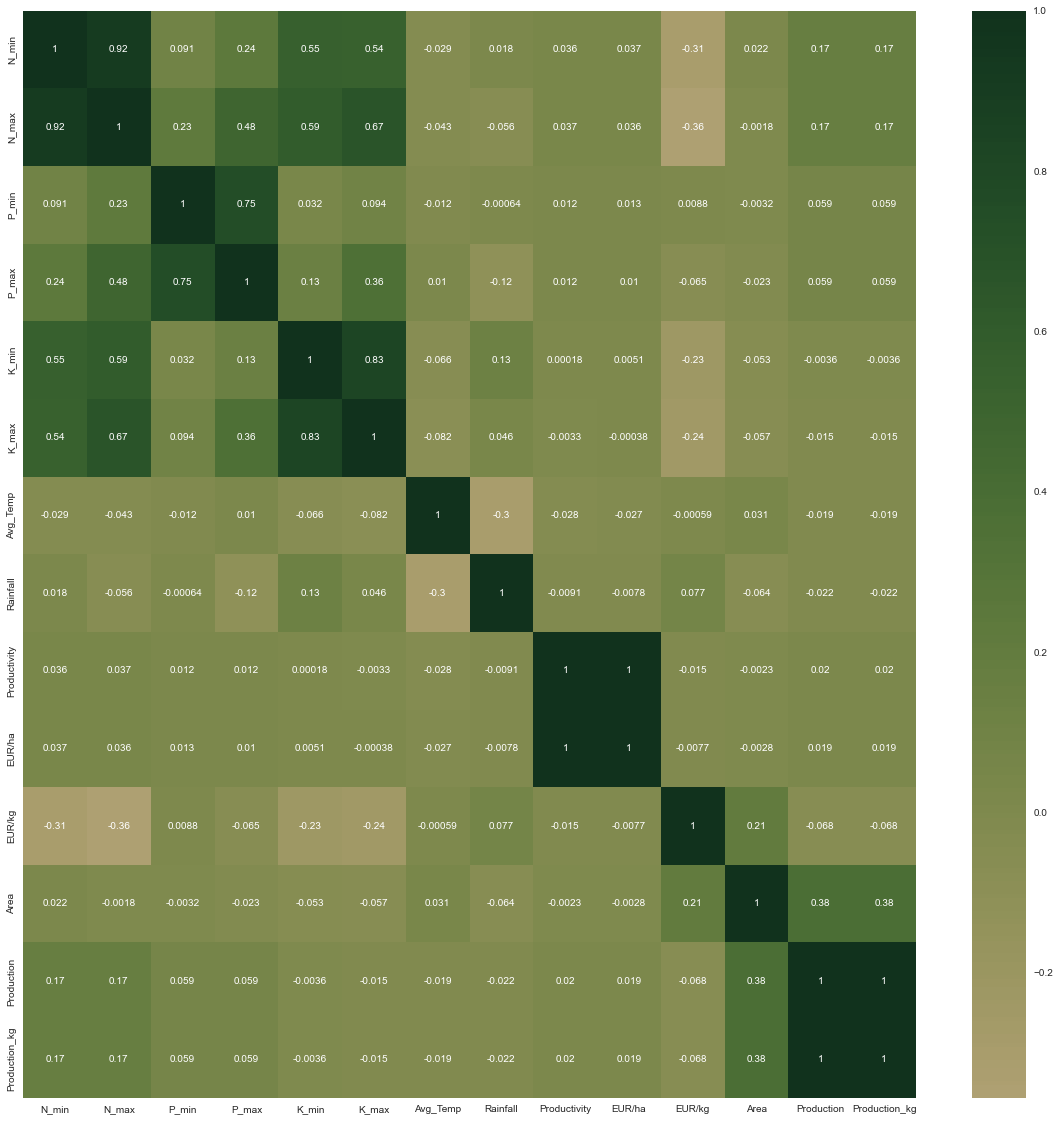

In [ ]:
#correlation matrix
corrmat = data.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corrmat, annot = True, cmap = cmap, center = 0)

# Data PreProcessing
## Scaling

In [ ]:
#Creating a copy of data
ds = data.copy()
ds

,Crop,N_min,N_max,P_min,P_max,K_min,K_max,Avg_Temp,Rainfall,Productivity,EUR/ha,EUR/kg,Area,Production,Production_kg
0,Arecanut,79,100,28,40,79,140,28.236667,1189.48,2750.000000,14119.607590,5.134403,4.0,11.0,11000.0
1,Arecanut,79,100,28,40,79,140,28.294583,887.11,1750.000000,8985.204830,5.134403,4.0,7.0,7000.0
2,Arecanut,79,100,28,40,79,140,28.545833,788.69,1444.444444,7416.359542,5.134403,18.0,26.0,26000.0
3,Arecanut,79,100,28,40,79,140,28.487500,805.96,722.222222,3708.179771,5.134403,18.0,13.0,13000.0
4,Arecanut,79,100,28,40,79,140,28.289167,1822.37,444.444444,2281.956782,5.134403,9.0,4.0,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30627,other oilseeds,90,100,10,15,45,50,27.330417,815.89,500.000000,855.733794,1.711468,1600.0,800.0,800000.0
30628,other oilseeds,90,100,10,15,45,50,27.190833,1323.06,500.000000,855.733794,1.711468,800.0,400.0,400000.0
30629,other oilseeds,90,100,10,15,45,50,27.066250,2632.85,500.000000,855.733794,1.711468,200.0,100.0,100000.0
30630,other oilseeds,90,100,10,15,45,50,27.972083,575.07,500.000000,855.733794,1.711468,200.0,100.0,100000.0


In [ ]:
#Dropping the unused features for the clustering
ds = ds.drop(columns = ["Crop", "Productivity", "EUR/ha", "EUR/kg", "Production", "Production_kg"])
ds

,N_min,N_max,P_min,P_max,K_min,K_max,Avg_Temp,Rainfall,Area
0,79,100,28,40,79,140,28.236667,1189.48,4.0
1,79,100,28,40,79,140,28.294583,887.11,4.0
2,79,100,28,40,79,140,28.545833,788.69,18.0
3,79,100,28,40,79,140,28.487500,805.96,18.0
4,79,100,28,40,79,140,28.289167,1822.37,9.0
...,...,...,...,...,...,...,...,...,...
30627,90,100,10,15,45,50,27.330417,815.89,1600.0
30628,90,100,10,15,45,50,27.190833,1323.06,800.0
30629,90,100,10,15,45,50,27.066250,2632.85,200.0
30630,90,100,10,15,45,50,27.972083,575.07,200.0


In [ ]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(ds)
scaled = scaler.transform(ds)
scaled_df = pd.DataFrame(scaled, columns = ds.columns)

In [ ]:
scaled_df

,N_min,N_max,P_min,P_max,K_min,K_max,Avg_Temp,Rainfall,Area
0,0.395,0.25,0.254545,0.16,0.153398,0.269231,0.945886,0.216072,0.000005
1,0.395,0.25,0.254545,0.16,0.153398,0.269231,0.947826,0.161146,0.000005
2,0.395,0.25,0.254545,0.16,0.153398,0.269231,0.956243,0.143267,0.000020
3,0.395,0.25,0.254545,0.16,0.153398,0.269231,0.954289,0.146405,0.000020
4,0.395,0.25,0.254545,0.16,0.153398,0.269231,0.947645,0.331038,0.000010
...,...,...,...,...,...,...,...,...,...
30627,0.450,0.25,0.090909,0.06,0.087379,0.096154,0.915528,0.148208,0.001809
30628,0.450,0.25,0.090909,0.06,0.087379,0.096154,0.910852,0.240337,0.000904
30629,0.450,0.25,0.090909,0.06,0.087379,0.096154,0.906679,0.478263,0.000226
30630,0.450,0.25,0.090909,0.06,0.087379,0.096154,0.937023,0.104463,0.000226


# Elbow Method

Elbow Method to determine the number of clusters to be formed:


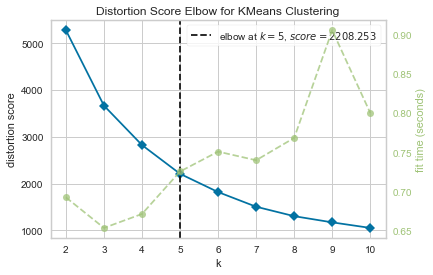

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k = 10)
Elbow_M.fit(scaled_df)
Elbow_M.show()
n_clusters_elbow = Elbow_M.elbow_value_

# KMeans

In [ ]:
KM_data = scaled_df.copy()

In [ ]:
KM_data

,N_min,N_max,P_min,P_max,K_min,K_max,Avg_Temp,Rainfall,Area
0,0.395,0.25,0.254545,0.16,0.153398,0.269231,0.945886,0.216072,0.000005
1,0.395,0.25,0.254545,0.16,0.153398,0.269231,0.947826,0.161146,0.000005
2,0.395,0.25,0.254545,0.16,0.153398,0.269231,0.956243,0.143267,0.000020
3,0.395,0.25,0.254545,0.16,0.153398,0.269231,0.954289,0.146405,0.000020
4,0.395,0.25,0.254545,0.16,0.153398,0.269231,0.947645,0.331038,0.000010
...,...,...,...,...,...,...,...,...,...
30627,0.450,0.25,0.090909,0.06,0.087379,0.096154,0.915528,0.148208,0.001809
30628,0.450,0.25,0.090909,0.06,0.087379,0.096154,0.910852,0.240337,0.000904
30629,0.450,0.25,0.090909,0.06,0.087379,0.096154,0.906679,0.478263,0.000226
30630,0.450,0.25,0.090909,0.06,0.087379,0.096154,0.937023,0.104463,0.000226


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
features = ["N_min",	"N_max",	"P_min",	"P_max",	"K_min",	"K_max",	"Avg_Temp",	"Rainfall"]
X = KM_data[features]

In [ ]:
#X_train, X_test = train_test_split(X, test_size= 0.3, random_state=42)
X_train = X.sample(frac = 0.7)
X_test = X.drop(X_train.index)

In [ ]:
KM = KMeans(n_clusters = n_clusters_elbow, init = 'random')
#label_KM = KM.fit_predict(scaled_df)
label_KM = KM.fit_predict(X_train)

X_train["KM_Clusters"] = label_KM

In [ ]:
X_train

,N_min,N_max,P_min,P_max,K_min,K_max,Avg_Temp,Rainfall,KM_Clusters
28042,0.045,0.2250,0.681818,0.30,0.128155,0.423077,0.856138,0.219256,2
27007,0.045,0.2250,0.681818,0.30,0.128155,0.423077,0.962147,0.139427,2
29886,0.150,0.1500,0.454545,0.20,0.116505,0.230769,0.851881,0.160259,0
29718,0.150,0.1500,0.454545,0.20,0.116505,0.230769,0.886287,0.264428,0
5720,0.050,0.1000,0.363636,0.24,0.038835,0.057692,0.864499,0.112755,0
...,...,...,...,...,...,...,...,...,...
25200,0.100,0.1125,0.363636,0.18,0.087379,0.115385,0.874255,0.127980,0
13817,0.300,0.2500,0.227273,0.18,0.087379,0.153846,0.868714,0.200453,0
19523,0.600,0.3750,0.363636,0.20,0.077670,0.153846,0.900105,0.150343,0
24337,0.100,0.1125,0.363636,0.18,0.087379,0.115385,0.853067,0.176268,0


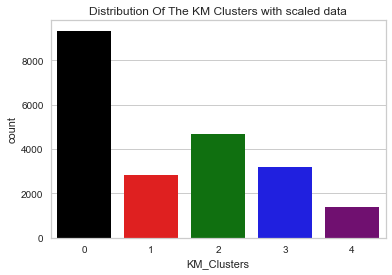

In [ ]:
#Plotting countplot of clusters
pallet5 = ["black", "red", "green", "blue", "purple"]
pl = sns.countplot(x = X_train["KM_Clusters"], palette = pallet5)
pl.set_title("Distribution Of The KM Clusters with scaled data")
plt.show()

In [ ]:
km_clusters_distribution = X_train["KM_Clusters"].value_counts()
print("The distribution for each KM cluster is:\n{}".format(km_clusters_distribution))

The distribution for each KM cluster is:
0    9331
2    4683
3    3185
1    2845
4    1398
Name: KM_Clusters, dtype: int64


Reletive Plot of All the Features in the KM Clusters with scaled data


<Figure size 432x288 with 0 Axes>

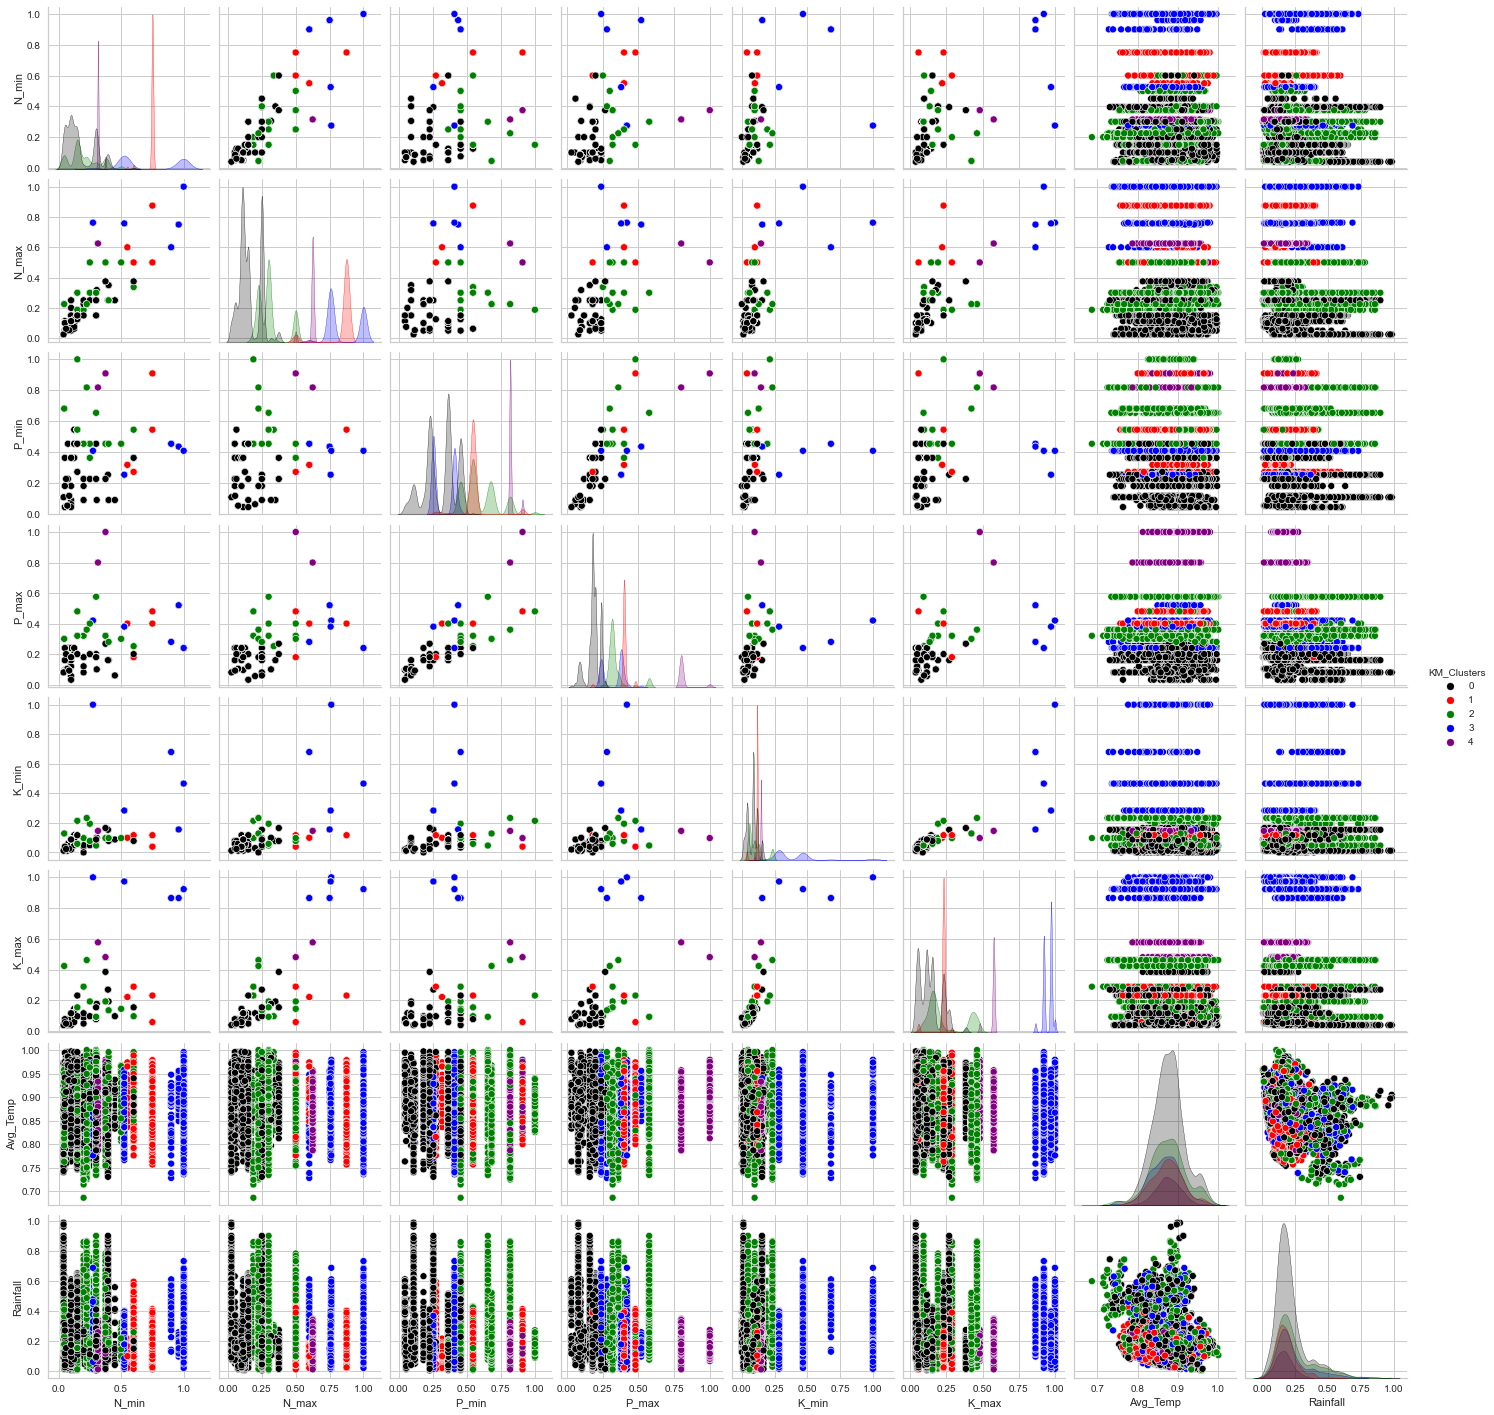

In [ ]:
#Plotting features
To_Plot = ["N_min",	"N_max",	"P_min",	"P_max",	"K_min",	"K_max",	"Avg_Temp",	"Rainfall", "KM_Clusters"]
print("Reletive Plot of All the Features in the KM Clusters with scaled data")
plt.figure()
sns.pairplot(X_train[To_Plot], hue = "KM_Clusters", palette = pallet5)
#Taking hue
plt.show()

In [ ]:
X_train = X_train.join(data['Crop'], on=X_train.index)
X_train

,N_min,N_max,P_min,P_max,K_min,K_max,Avg_Temp,Rainfall,KM_Clusters,Crop
28042,0.045,0.2250,0.681818,0.30,0.128155,0.423077,0.856138,0.219256,2,Tobacco
27007,0.045,0.2250,0.681818,0.30,0.128155,0.423077,0.962147,0.139427,2,Tobacco
29886,0.150,0.1500,0.454545,0.20,0.116505,0.230769,0.851881,0.160259,0,Turmeric
29718,0.150,0.1500,0.454545,0.20,0.116505,0.230769,0.886287,0.264428,0,Turmeric
5720,0.050,0.1000,0.363636,0.24,0.038835,0.057692,0.864499,0.112755,0,Coriander
...,...,...,...,...,...,...,...,...,...,...
25200,0.100,0.1125,0.363636,0.18,0.087379,0.115385,0.874255,0.127980,0,Sweet potato
13817,0.300,0.2500,0.227273,0.18,0.087379,0.153846,0.868714,0.200453,0,Onion
19523,0.600,0.3750,0.363636,0.20,0.077670,0.153846,0.900105,0.150343,0,Rice
24337,0.100,0.1125,0.363636,0.18,0.087379,0.115385,0.853067,0.176268,0,Sweet potato


In [ ]:
X_train.isna().sum()

N_min          0
N_max          0
P_min          0
P_max          0
K_min          0
K_max          0
Avg_Temp       0
Rainfall       0
KM_Clusters    0
Crop           0
dtype: int64

In [ ]:
test_AC_scaled = X_train.copy()
test_AC_scaled = test_AC_scaled.drop(columns = ["N_min", "N_max", "P_min", "P_max", "K_min", "K_max", "Avg_Temp", "Rainfall"])
test_AC_scaled["Count"] = 1
test_AC_scaled = test_AC_scaled.groupby(["Crop", "KM_Clusters"]).sum().reset_index()

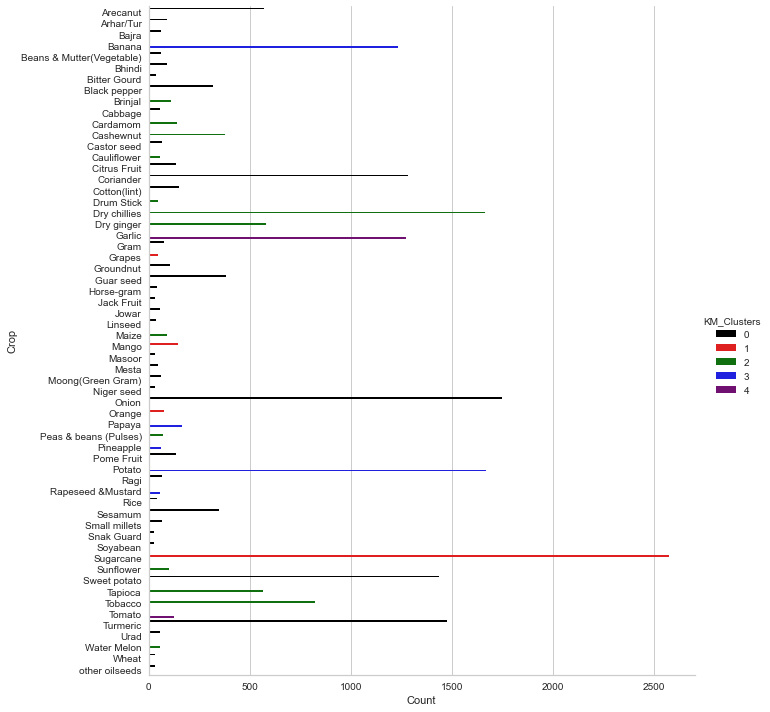

In [ ]:
sns.catplot(data = test_AC_scaled, x = "Count", y = "Crop", hue = "KM_Clusters", kind = "bar", height = 10, palette = pallet5)

In [ ]:
label_KM = KM.predict(X_test)
X_test['KM_Clusters'] = label_KM


In [ ]:
X_test

,N_min,N_max,P_min,P_max,K_min,K_max,Avg_Temp,Rainfall,KM_Clusters
1,0.395,0.25,0.254545,0.16,0.153398,0.269231,0.947826,0.161146,0
2,0.395,0.25,0.254545,0.16,0.153398,0.269231,0.956243,0.143267,0
10,0.395,0.25,0.254545,0.16,0.153398,0.269231,0.920218,0.094837,0
12,0.395,0.25,0.254545,0.16,0.153398,0.269231,0.929890,0.101598,0
16,0.395,0.25,0.254545,0.16,0.153398,0.269231,0.841036,0.146098,0
...,...,...,...,...,...,...,...,...,...
30616,0.450,0.25,0.090909,0.06,0.087379,0.096154,0.916812,0.406102,0
30618,0.450,0.25,0.090909,0.06,0.087379,0.096154,0.897704,0.401977,0
30621,0.450,0.25,0.090909,0.06,0.087379,0.096154,0.856082,0.331172,0
30624,0.450,0.25,0.090909,0.06,0.087379,0.096154,0.885044,0.274911,0


In [ ]:
X_test = X_test.join(data['Crop'], on=X_test.index)
X_test

,N_min,N_max,P_min,P_max,K_min,K_max,Avg_Temp,Rainfall,KM_Clusters,Crop
1,0.395,0.25,0.254545,0.16,0.153398,0.269231,0.947826,0.161146,0,Arecanut
2,0.395,0.25,0.254545,0.16,0.153398,0.269231,0.956243,0.143267,0,Arecanut
10,0.395,0.25,0.254545,0.16,0.153398,0.269231,0.920218,0.094837,0,Arecanut
12,0.395,0.25,0.254545,0.16,0.153398,0.269231,0.929890,0.101598,0,Arecanut
16,0.395,0.25,0.254545,0.16,0.153398,0.269231,0.841036,0.146098,0,Arecanut
...,...,...,...,...,...,...,...,...,...,...
30616,0.450,0.25,0.090909,0.06,0.087379,0.096154,0.916812,0.406102,0,other oilseeds
30618,0.450,0.25,0.090909,0.06,0.087379,0.096154,0.897704,0.401977,0,other oilseeds
30621,0.450,0.25,0.090909,0.06,0.087379,0.096154,0.856082,0.331172,0,other oilseeds
30624,0.450,0.25,0.090909,0.06,0.087379,0.096154,0.885044,0.274911,0,other oilseeds


In [ ]:
X_test.isna().sum()

N_min          0
N_max          0
P_min          0
P_max          0
K_min          0
K_max          0
Avg_Temp       0
Rainfall       0
KM_Clusters    0
Crop           0
dtype: int64

In [ ]:
test_AC_scaled = X_test.copy()
test_AC_scaled = test_AC_scaled.drop(columns = ["N_min", "N_max", "P_min", "P_max", "K_min", "K_max", "Avg_Temp", "Rainfall"])
test_AC_scaled["Count"] = 1
test_AC_scaled = test_AC_scaled.groupby(["Crop", "KM_Clusters"]).sum().reset_index()

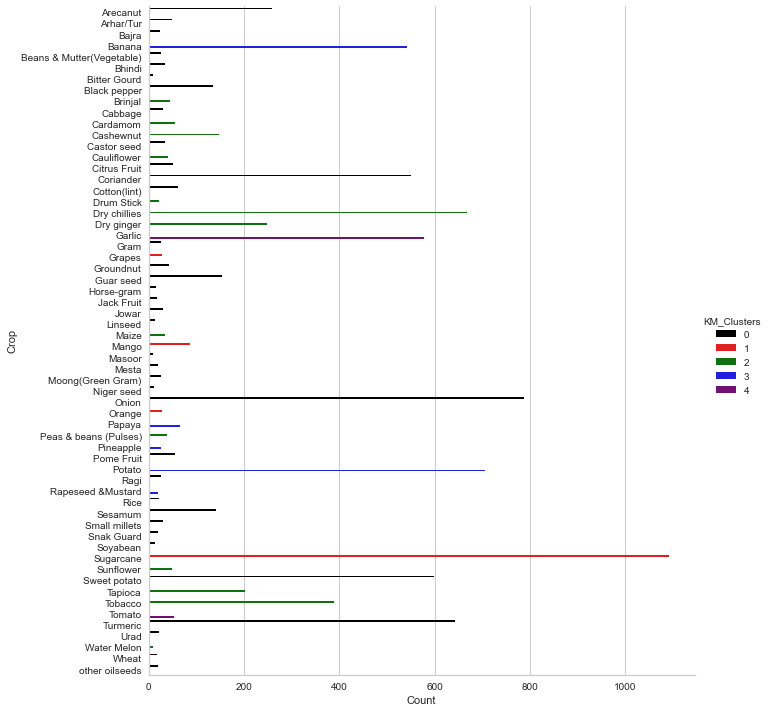

In [ ]:
sns.catplot(data = test_AC_scaled, x = "Count", y = "Crop", hue = "KM_Clusters", kind = "bar", height = 10, palette = pallet5)

In [ ]:

tkm_cluster0_distribution = pd.DataFrame(X_test.query("KM_Clusters == 0")["Crop"].value_counts())
#print("The distribution for test cluster 0 is:\n{}".format(tkm_cluster0_distribution))
km_cluster0_distribution = pd.DataFrame(X_train.query("KM_Clusters == 0")["Crop"].value_counts())
#print("The distribution for train cluster 0 is:\n{}".format(km_cluster0_distribution))

tkm_cluster1_distribution = pd.DataFrame(X_test.query("KM_Clusters == 1")["Crop"].value_counts())
#print("The distribution for test cluster 1 is:\n{}".format(tkm_cluster1_distribution))
km_cluster1_distribution = pd.DataFrame(X_train.query("KM_Clusters == 1")["Crop"].value_counts())
#print("The distribution for train cluster 1 is:\n{}".format(km_cluster1_distribution))

tkm_cluster2_distribution = pd.DataFrame(X_test.query("KM_Clusters == 2")["Crop"].value_counts())
#print("The distribution for test cluster 2 is:\n{}".format(tkm_cluster2_distribution))
km_cluster2_distribution = pd.DataFrame(X_train.query("KM_Clusters == 2")["Crop"].value_counts())
#print("The distribution for train cluster 2 is:\n{}".format(km_cluster2_distribution))

tkm_cluster3_distribution = pd.DataFrame(X_test.query("KM_Clusters == 3")["Crop"].value_counts())
#print("The distribution for test cluster 3 is:\n{}".format(tkm_cluster3_distribution))
km_cluster3_distribution = pd.DataFrame(X_train.query("KM_Clusters == 3")["Crop"].value_counts())
#print("The distribution for train cluster 3 is:\n{}".format(km_cluster3_distribution))

tkm_cluster4_distribution = pd.DataFrame(X_test.query("KM_Clusters == 4")["Crop"].value_counts())
#print("The distribution for test cluster 4 is:\n{}".format(tkm_cluster4_distribution))
km_cluster4_distribution = pd.DataFrame(X_train.query("KM_Clusters == 4")["Crop"].value_counts())
#print("The distribution for train cluster 4 is:\n{}".format(km_cluster4_distribution))

# Summary evaluation

In [ ]:
crops = data.Crop.unique()

In [ ]:
tot_train = pd.DataFrame(X_train["Crop"].value_counts())
tot_test = pd.DataFrame(X_test["Crop"].value_counts())

In [ ]:
summary_df = pd.DataFrame()

In [ ]:
summary_df.index = crops
summary_df

""
Arecanut
Arhar/Tur
Bajra
Banana
Beans & Mutter(Vegetable)
Bhindi
Bitter Gourd
Black pepper
Brinjal
Cabbage


In [ ]:
summary_df['train % cluster 0'] = summary_df.join(km_cluster0_distribution)

tmp = summary_df.join(km_cluster1_distribution)
summary_df['train % cluster 1'] = tmp['Crop']

tmp = summary_df.join(km_cluster2_distribution)
summary_df['train % cluster 2'] = tmp['Crop']

tmp = summary_df.join(km_cluster3_distribution)
summary_df['train % cluster 3'] = tmp['Crop']

tmp = summary_df.join(km_cluster4_distribution)
summary_df['train % cluster 4'] = tmp['Crop']
summary_df = summary_df.fillna(0)

tmp = summary_df.join(tot_train)
summary_df['train tot'] = tmp['Crop']

summary_df['train % cluster 0'] = ( summary_df['train % cluster 0'] / summary_df['train tot'] )
summary_df['train % cluster 1'] = ( summary_df['train % cluster 1'] / summary_df['train tot'] )
summary_df['train % cluster 2'] = ( summary_df['train % cluster 2'] / summary_df['train tot'] )
summary_df['train % cluster 3'] = ( summary_df['train % cluster 3'] / summary_df['train tot'] )
summary_df['train % cluster 4'] = ( summary_df['train % cluster 4'] / summary_df['train tot'] )
summary_df

,train % cluster 0,train % cluster 1,train % cluster 2,train % cluster 3,train % cluster 4,train tot
Arecanut,1.0,0.0,0.0,0.0,0.0,572
Arhar/Tur,1.0,0.0,0.0,0.0,0.0,93
Bajra,1.0,0.0,0.0,0.0,0.0,62
Banana,0.0,0.0,0.0,1.0,0.0,1232
Beans & Mutter(Vegetable),1.0,0.0,0.0,0.0,0.0,59
Bhindi,1.0,0.0,0.0,0.0,0.0,93
Bitter Gourd,1.0,0.0,0.0,0.0,0.0,38
Black pepper,1.0,0.0,0.0,0.0,0.0,318
Brinjal,0.0,0.0,1.0,0.0,0.0,112
Cabbage,1.0,0.0,0.0,0.0,0.0,58


In [ ]:
tmp = summary_df.join(tkm_cluster0_distribution)
summary_df['test % cluster 0'] = tmp['Crop']

tmp = summary_df.join(tkm_cluster1_distribution)
summary_df['test % cluster 1'] = tmp['Crop']

tmp = summary_df.join(tkm_cluster2_distribution)
summary_df['test % cluster 2'] = tmp['Crop']

tmp = summary_df.join(tkm_cluster3_distribution)
summary_df['test % cluster 3'] = tmp['Crop']

tmp = summary_df.join(tkm_cluster4_distribution)
summary_df['test % cluster 4'] = tmp['Crop']
summary_df = summary_df.fillna(0)

tmp = summary_df.join(tot_test)
summary_df['test tot'] = tmp['Crop']

summary_df['test % cluster 0'] = ( summary_df['test % cluster 0'] / summary_df['test tot'] )
summary_df['test % cluster 1'] = ( summary_df['test % cluster 1'] / summary_df['test tot'] )
summary_df['test % cluster 2'] = ( summary_df['test % cluster 2'] / summary_df['test tot'] )
summary_df['test % cluster 3'] = ( summary_df['test % cluster 3'] / summary_df['test tot'] )
summary_df['test % cluster 4'] = ( summary_df['test % cluster 4'] / summary_df['test tot'] )
summary_df

,train % cluster 0,train % cluster 1,train % cluster 2,train % cluster 3,train % cluster 4,train tot,test % cluster 0,test % cluster 1,test % cluster 2,test % cluster 3,test % cluster 4,test tot
Arecanut,1.0,0.0,0.0,0.0,0.0,572,1.000000,0.0,0.000000,0.0,0.0,258
Arhar/Tur,1.0,0.0,0.0,0.0,0.0,93,1.000000,0.0,0.000000,0.0,0.0,48
Bajra,1.0,0.0,0.0,0.0,0.0,62,1.000000,0.0,0.000000,0.0,0.0,24
Banana,0.0,0.0,0.0,1.0,0.0,1232,0.000000,0.0,0.000000,1.0,0.0,541
Beans & Mutter(Vegetable),1.0,0.0,0.0,0.0,0.0,59,1.000000,0.0,0.000000,0.0,0.0,25
Bhindi,1.0,0.0,0.0,0.0,0.0,93,1.000000,0.0,0.000000,0.0,0.0,35
Bitter Gourd,1.0,0.0,0.0,0.0,0.0,38,1.000000,0.0,0.000000,0.0,0.0,9
Black pepper,1.0,0.0,0.0,0.0,0.0,318,1.000000,0.0,0.000000,0.0,0.0,135
Brinjal,0.0,0.0,1.0,0.0,0.0,112,0.000000,0.0,1.000000,0.0,0.0,45
Cabbage,1.0,0.0,0.0,0.0,0.0,58,1.000000,0.0,0.000000,0.0,0.0,29


In [ ]:
targets = ['Productivity', 'EUR/ha', 'EUR/kg', 'Production']
for i in targets:
    X_train = X_train.join(data[i], on=X_train.index)
    X_test = X_test.join(data[i], on=X_test.index)
X_train = X_train.loc[(X_train['Production'] > 0)]
X_test = X_test.loc[(X_test['Production'] > 0)]
X_train

,N_min,N_max,P_min,P_max,K_min,K_max,Avg_Temp,Rainfall,KM_Clusters,Crop,Productivity,EUR/ha,EUR/kg,Production
28042,0.045,0.2250,0.681818,0.30,0.128155,0.423077,0.856138,0.219256,2,Tobacco,111.111111,126.775377,1.140978,1.0
27007,0.045,0.2250,0.681818,0.30,0.128155,0.423077,0.962147,0.139427,2,Tobacco,2771.310659,3162.005577,1.140978,19474.0
29886,0.150,0.1500,0.454545,0.20,0.116505,0.230769,0.851881,0.160259,0,Turmeric,1108.108108,2781.520294,2.510152,164.0
29718,0.150,0.1500,0.454545,0.20,0.116505,0.230769,0.886287,0.264428,0,Turmeric,1905.187835,4782.311932,2.510152,2130.0
5720,0.050,0.1000,0.363636,0.24,0.038835,0.057692,0.864499,0.112755,0,Coriander,1166.666667,3993.424369,3.422935,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25200,0.100,0.1125,0.363636,0.18,0.087379,0.115385,0.874255,0.127980,0,Sweet potato,5625.000000,4813.502587,0.855734,135.0
13817,0.300,0.2500,0.227273,0.18,0.087379,0.153846,0.868714,0.200453,0,Onion,23219.740634,5298.644462,0.228196,32229.0
19523,0.600,0.3750,0.363636,0.20,0.077670,0.153846,0.900105,0.150343,0,Rice,411.097100,126.644285,0.308064,5216.0
24337,0.100,0.1125,0.363636,0.18,0.087379,0.115385,0.853067,0.176268,0,Sweet potato,5061.538462,4331.329508,0.855734,987.0


In [ ]:
X_train.loc[(X_train['Crop']=='Rice')]

,N_min,N_max,P_min,P_max,K_min,K_max,Avg_Temp,Rainfall,KM_Clusters,Crop,Productivity,EUR/ha,EUR/kg,Production
19528,0.6,0.375,0.363636,0.2,0.07767,0.153846,0.889064,0.119209,0,Rice,647.832087,199.573851,0.308064,53520.0
19570,0.6,0.375,0.363636,0.2,0.07767,0.153846,0.869160,0.231087,0,Rice,3116.522967,960.089047,0.308064,61810.0
19525,0.6,0.375,0.363636,0.2,0.07767,0.153846,0.890586,0.150128,0,Rice,489.629401,150.837273,0.308064,28564.0
19542,0.6,0.375,0.363636,0.2,0.07767,0.153846,0.938223,0.183369,0,Rice,805.351092,248.099812,0.308064,6893.0
19565,0.6,0.375,0.363636,0.2,0.07767,0.153846,0.910043,0.243029,0,Rice,2663.541650,820.541736,0.308064,331840.0
19566,0.6,0.375,0.363636,0.2,0.07767,0.153846,0.902366,0.194937,0,Rice,3166.337956,975.435260,0.308064,203890.0
19535,0.6,0.375,0.363636,0.2,0.07767,0.153846,0.907474,0.124913,0,Rice,2135.832821,657.973556,0.308064,3475.0
19518,0.6,0.375,0.363636,0.2,0.07767,0.153846,0.896462,0.196611,0,Rice,1118.995879,344.722532,0.308064,14933.0
19562,0.6,0.375,0.363636,0.2,0.07767,0.153846,0.899211,0.235627,0,Rice,1820.512821,560.834763,0.308064,149100.0
19516,0.6,0.375,0.363636,0.2,0.07767,0.153846,0.880997,0.233027,0,Rice,1364.944651,420.490535,0.308064,338221.0


In [ ]:
X_train = X_train.join(data['freq_enc_crop'], on=X_train.index)
X_train

KeyError: 'freq_enc_crop'

In [ ]:
cluster0_train = X_train[X_train["KM_Clusters"] == 0]
cluster1_train = X_train[X_train["KM_Clusters"] == 1]
cluster2_train = X_train[X_train["KM_Clusters"] == 2]
cluster3_train = X_train[X_train["KM_Clusters"] == 3]
cluster4_train = X_train[X_train["KM_Clusters"] == 4]
train_clusters = [cluster0_train, cluster1_train, cluster2_train, cluster3_train, cluster4_train]
for i in train_clusters:
    freq_enc_crop = (i.groupby('Crop').size()) / i.shape[0]
    i['freq_enc_crop'] = i['Crop'].apply(lambda x : freq_enc_crop[x])
for i in train_clusters:
    i['encoded_crops'] = i.loc[:, 'Crop']
    crop_dict = {}
    for j in range(len(i['encoded_crops'].unique())):
        crop_dict[i['encoded_crops'].unique()[j]]=j
    i['encoded_crops'].replace(crop_dict, inplace=True)


In [ ]:
X_test = X_test.join(data['freq_enc_crop'], on=X_test.index)
X_test

KeyError: 'freq_enc_crop'

In [ ]:
cluster0_test = X_test[X_test["KM_Clusters"] == 0]
cluster1_test = X_test[X_test["KM_Clusters"] == 1]
cluster2_test = X_test[X_test["KM_Clusters"] == 2]
cluster3_test = X_test[X_test["KM_Clusters"] == 3]
cluster4_test = X_test[X_test["KM_Clusters"] == 4]
test_clusters = [cluster0_test, cluster1_test, cluster2_test, cluster3_test, cluster4_test]
for i in test_clusters:
    freq_enc_crop = (i.groupby('Crop').size()) / i.shape[0]
    i['freq_enc_crop'] = i['Crop'].apply(lambda x : freq_enc_crop[x])

for i in test_clusters:
    i['encoded_crops'] = i.loc[:, 'Crop']
    crop_dict = {}
    for j in range(len(i['encoded_crops'].unique())):
        crop_dict[i['encoded_crops'].unique()[j]]=j
    i['encoded_crops'].replace(crop_dict, inplace=True)
cluster4_test

,N_min,N_max,P_min,P_max,K_min,K_max,Avg_Temp,Rainfall,KM_Clusters,Crop,Productivity,EUR/ha,EUR/kg,Production,freq_enc_crop,encoded_crops
10164,0.315,0.625,0.818182,0.8,0.145631,0.576923,0.914872,0.185006,4,Garlic,3000.000000,5237.090814,1.745697,3.0,0.945634,0
10165,0.315,0.625,0.818182,0.8,0.145631,0.576923,0.911383,0.250410,4,Garlic,3375.000000,5891.727166,1.745697,27.0,0.945634,0
10171,0.315,0.625,0.818182,0.8,0.145631,0.576923,0.834099,0.270108,4,Garlic,3500.000000,6109.939283,1.745697,21.0,0.945634,0
10174,0.315,0.625,0.818182,0.8,0.145631,0.576923,0.820881,0.262660,4,Garlic,3454.545455,6030.589422,1.745697,38.0,0.945634,0
10178,0.315,0.625,0.818182,0.8,0.145631,0.576923,0.835313,0.257558,4,Garlic,3333.333333,5818.989793,1.745697,10.0,0.945634,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28237,0.375,0.500,0.909091,1.0,0.097087,0.480769,0.963752,0.165062,4,Tomato,10144.444444,3472.377570,0.342294,913.0,0.054366,1
28240,0.375,0.500,0.909091,1.0,0.097087,0.480769,0.848950,0.135327,4,Tomato,3652.615144,1250.266485,0.342294,4679.0,0.054366,1
28241,0.375,0.500,0.909091,1.0,0.097087,0.480769,0.867793,0.111812,4,Tomato,3714.670256,1271.507547,0.342294,5520.0,0.054366,1
28242,0.375,0.500,0.909091,1.0,0.097087,0.480769,0.883690,0.097773,4,Tomato,5710.447761,1954.649250,0.342294,1913.0,0.054366,1


In [ ]:
cluster0_df = pd.concat([cluster0_train, cluster0_test])
cluster1_df = pd.concat([cluster1_train, cluster1_test])
cluster2_df = pd.concat([cluster2_train, cluster2_test])
cluster3_df = pd.concat([cluster3_train, cluster3_test])
cluster4_df = pd.concat([cluster4_train, cluster4_test])
full_clusters = [cluster0_df, cluster1_df, cluster2_df, cluster3_df, cluster4_df]
cluster0_df

,N_min,N_max,P_min,P_max,K_min,K_max,Avg_Temp,Rainfall,KM_Clusters,Crop,Productivity,EUR/ha,EUR/kg,Production,freq_enc_crop,encoded_crops
29886,0.15,0.15,0.454545,0.20,0.116505,0.230769,0.851881,0.160259,0,Turmeric,1108.108108,2781.520294,2.510152,164.0,0.165263,0
29718,0.15,0.15,0.454545,0.20,0.116505,0.230769,0.886287,0.264428,0,Turmeric,1905.187835,4782.311932,2.510152,2130.0,0.165263,0
5720,0.05,0.10,0.363636,0.24,0.038835,0.057692,0.864499,0.112755,0,Coriander,1166.666667,3993.424369,3.422935,14.0,0.144269,1
13867,0.30,0.25,0.227273,0.18,0.087379,0.153846,0.861023,0.295850,0,Onion,14322.903630,3268.424708,0.228196,22888.0,0.196138,2
5222,0.05,0.10,0.363636,0.24,0.038835,0.057692,0.858818,0.178988,0,Coriander,369.668246,1265.350443,3.422935,78.0,0.144269,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30603,0.45,0.25,0.090909,0.06,0.087379,0.096154,0.898821,0.058261,0,other oilseeds,868.297988,1486.063862,1.711468,23952.0,0.003896,33
30607,0.45,0.25,0.090909,0.06,0.087379,0.096154,0.828125,0.101524,0,other oilseeds,1039.205397,1778.566354,1.711468,13863.0,0.003896,33
30611,0.45,0.25,0.090909,0.06,0.087379,0.096154,0.872287,0.153411,0,other oilseeds,1125.000000,1925.401035,1.711468,9.0,0.003896,33
30612,0.45,0.25,0.090909,0.06,0.087379,0.096154,0.893028,0.140695,0,other oilseeds,1866.639968,3194.693802,1.711468,4661.0,0.003896,33


In [ ]:
# targets = ['Productivity', 'EUR/ha', 'EUR/kg', 'Production']
# for i in targets:
#     for j in range(len(train_clusters)):
#         train_clusters[j] = train_clusters[j].
#         (data[i], on=train_clusters[j].index)
#         test_clusters[j] = test_clusters[j].join(data[i], on=test_clusters[j].index)

#     # X_train = X_train.join(data[i], on=X_train.index)
#     # X_test = X_test.join(data[i], on=X_test.index)

# cluster4_train

In [ ]:
y_train = X_train[targets]
y_test = X_test[targets]

In [ ]:
features.append('encoded_crops')
features

['N_min',
 'N_max',
 'P_min',
 'P_max',
 'K_min',
 'K_max',
 'Avg_Temp',
 'Rainfall',
 'encoded_crops']

# Regression

In [ ]:
booster_c0 = XGBRegressor(
 use_label_encoder = False,
 objective= 'reg:squarederror',
 nthread=8,
 learning_rate = 0.1,
 n_estimators = 62,
 max_depth = 3,
 colsample_bytree=1,
 eval_metric = 'rmse',
 seed=7)

booster_c1 = XGBRegressor(
 use_label_encoder = False,
 objective= 'reg:squarederror',
 nthread=8,
 learning_rate = 0.1,
 n_estimators = 62,
 max_depth = 3,
 colsample_bytree=1,
 eval_metric = 'rmse',
 seed=7)


booster_c2 = XGBRegressor(
 use_label_encoder = False,
 objective= 'reg:squarederror',
 nthread=8,
 learning_rate = 0.1,
 n_estimators = 62,
 max_depth = 3,
 colsample_bytree=1,
 eval_metric = 'rmse',
 seed=7)

booster_c3 = XGBRegressor(
 use_label_encoder = False,
 objective= 'reg:squarederror',
 nthread=8,
 learning_rate = 0.1,
 n_estimators = 62,
 max_depth = 3,
 colsample_bytree=1,
 eval_metric = 'rmse',
 seed=7)

booster_c4 = XGBRegressor(
 use_label_encoder = False,
 objective= 'reg:squarederror',
 nthread=8,
 learning_rate = 0.1,
 n_estimators = 62,
 max_depth = 3,
 colsample_bytree=1,
 eval_metric = 'rmse',
 seed=7)


booster_c0.fit(cluster0_train[features], cluster0_train['Productivity'])
booster_c1.fit(cluster1_train[features], cluster1_train['Productivity'])
booster_c2.fit(cluster2_train[features], cluster2_train['Productivity'])
booster_c3.fit(cluster3_train[features], cluster3_train['Productivity'])
booster_c4.fit(cluster4_train[features], cluster4_train['Productivity'])
# boosters = [booster_c0, booster_c1, booster_c2, booster_c3, booster_c4]
# for i in range(len(boosters)):
#     boosters[i].fit(train_clusters[i][features], train_clusters[i]['Production'])

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=62, n_jobs=8, nthread=8,
             num_parallel_tree=1, predictor='auto', ...)

In [ ]:
y_pred_c0 = booster_c0.predict(cluster0_test[features])
r2 = r2_score(cluster0_test['Productivity'], y_pred_c0)
mae = mean_absolute_error(cluster0_test['Productivity'], y_pred_c0)
print(r2, mae)

0.36403482833181977 2652.5350690487357


In [ ]:
y_pred_c1 = booster_c1.predict(cluster1_test[features])
r2 = r2_score(cluster1_test['Productivity'], y_pred_c1)
mae = mean_absolute_error(cluster1_test['Productivity'], y_pred_c1)
print(r2, mae)

-0.432670877394689 329430.16698162176


In [ ]:
booster_c2 =XGBRegressor(use_label_encoder=False)

eta=[0.1]
n_estimators = range(1, 90) #DO NOT RUN ON COLAB, ITS GONNA TAKE HOURS; DO NOT RUN IF INSUFFICIENT MEMORY

# [50, 75, 80, 100, 150, 200, 250, 300, 350]
max_depth = [3, 4, 5, 6, 7]
# max_depth = range(1,10)
# learning_rate = []
colsample_bytree = [0.8, 0.9, 1]
param_grid = dict(eta=eta, max_depth=max_depth, n_estimators=n_estimators, colsample_bytree=colsample_bytree)
grid_search = GridSearchCV(booster_c2, param_grid, scoring="r2", n_jobs=-1, cv=5, verbose=1)
grid_result = grid_search.fit(cluster2_train[features], cluster2_train['Productivity'])
print(f"Best r2: {grid_result.best_score_:.4} using {grid_result.best_params_}")


Fitting 5 folds for each of 1335 candidates, totalling 6675 fits
Best r2: 0.7202 using {'colsample_bytree': 1, 'eta': 0.1, 'max_depth': 5, 'n_estimators': 41}


In [ ]:
booster_c2 = XGBRegressor(
 use_label_encoder = False,
 objective= 'reg:squarederror',
 nthread=8,
 learning_rate = 0.1,
 n_estimators = 41,
 max_depth = 5,
 colsample_bytree=1,
 eval_metric = 'rmse',
 seed=7)
booster_c2.fit(cluster2_train[features], cluster2_train['Productivity'])

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=41, n_jobs=8, nthread=8,
             num_parallel_tree=1, predictor='auto', ...)

In [ ]:
y_pred_c2 = booster_c2.predict(cluster2_test[features])
r2 = r2_score(cluster2_test['Productivity'], y_pred_c2)
mae = mean_absolute_error(cluster2_test['Productivity'], y_pred_c2)
mape = mean_squared_error(cluster2_test['Productivity'], y_pred_c2, squared = False)
print(r2, mae, mape, cluster2_test['Productivity'].max(), cluster2_test['Productivity'].min())

0.7493261136593119 1766.792769118436 3959.2109686626013 52502.30894883228 1.6666666666666667


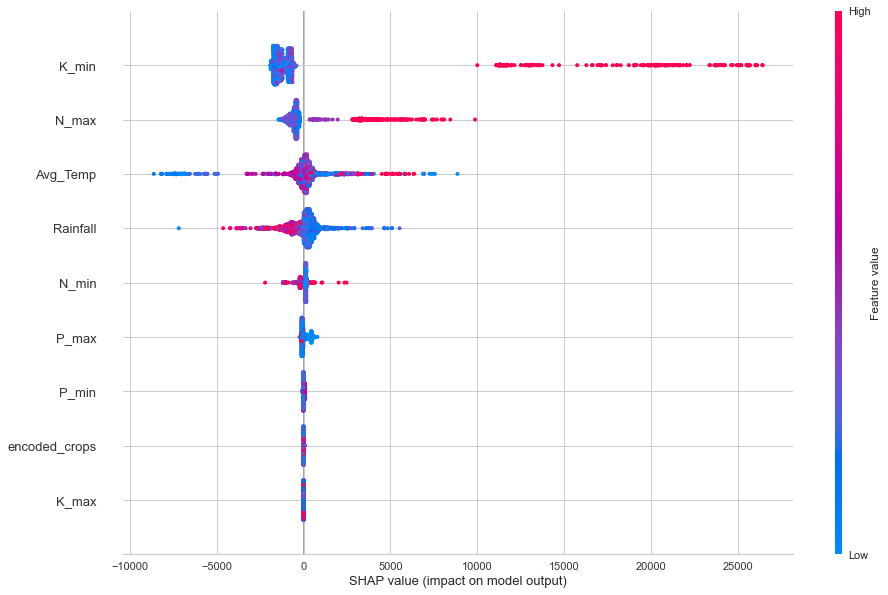

In [ ]:
import shap
explainer = shap.Explainer(booster_c2, cluster2_test[[*features]])
shap_values = explainer(cluster2_test[[*features]])
shap.plots.beeswarm(shap_values, max_display = 20, plot_size=[15,10])


In [ ]:
cluster2_test['Crop'].unique()

array(['Brinjal', 'Cardamom', 'Cashewnut', 'Drum Stick', 'Dry chillies',
       'Dry ginger', 'Maize', 'Peas & beans (Pulses)', 'Rice',
       'Sunflower', 'Tapioca', 'Tobacco'], dtype=object)

In [ ]:
cluster2_train['Crop'].value_counts()

Dry chillies             1648
Tobacco                   825
Dry ginger                583
Tapioca                   566
Cashewnut                 377
Cardamom                  138
Sunflower                 101
Maize                      89
Peas & beans (Pulses)      71
Brinjal                    40
Drum Stick                 29
Name: Crop, dtype: int64

In [ ]:
X_train_Brinjal = cluster2_train.loc[(cluster2_train['Crop'] == 'Brinjal')]
X_train_Cardamom = cluster2_train.loc[(cluster2_train['Crop'] == 'Cardamom')]
X_train_Cashewnut = cluster2_train.loc[(cluster2_train['Crop'] == 'Cashewnut')]
X_train_DS = cluster2_train.loc[(cluster2_train['Crop'] == 'Drum Stick')]
X_train_DC = cluster2_train.loc[(cluster2_train['Crop'] == 'Dry chillies')]
X_train_DG = cluster2_train.loc[(cluster2_train['Crop'] == 'Dry ginger')]
X_train_Maize = cluster2_train.loc[(cluster2_train['Crop'] == 'Maize')]
X_train_Peas = cluster2_train.loc[(cluster2_train['Crop'] == 'Peas & beans (Pulses)')]
X_train_Rice = cluster2_train.loc[(cluster2_train['Crop'] == 'Rice')]
X_train_Sunflower = cluster2_train.loc[(cluster2_train['Crop'] == 'Sunflower')]
X_train_Tapioca = cluster2_train.loc[(cluster2_train['Crop'] == 'Tapioca')]
X_train_Tobacco = cluster2_train.loc[(cluster2_train['Crop'] == 'Tobacco')]

# X_train_Brinjal = X_train.loc[(X_train['Crop'] == 'Brinjal')]
# X_train_Cardamom = X_train.loc[(X_train['Crop'] == 'Cardamom')]
# X_train_Cashewnut = X_train.loc[(X_train['Crop'] == 'Cashewnut')]
# X_train_DS = X_train.loc[(X_train['Crop'] == 'Drum Stick')]
# X_train_DC = X_train.loc[(X_train['Crop'] == 'Dry chillies')]
# X_train_DG = X_train.loc[(X_train['Crop'] == 'Dry ginger')]
# X_train_Maize = X_train.loc[(X_train['Crop'] == 'Maize')]
# X_train_Peas = X_train.loc[(X_train['Crop'] == 'Peas & beans (Pulses)')]
# X_train_Rice = X_train.loc[(X_train['Crop'] == 'Rice')]
# X_train_Sunflower = X_train.loc[(X_train['Crop'] == 'Sunflower')]
# X_train_Tapioca = X_train.loc[(X_train['Crop'] == 'Tapioca')]
# X_train_Tobacco = X_train.loc[(X_train['Crop'] == 'Tobacco')]

In [ ]:
X_test_Brinjal = cluster2_test.loc[(cluster2_test['Crop'] == 'Brinjal')]
X_test_Cardamom = cluster2_test.loc[(cluster2_test['Crop'] == 'Cardamom')]
X_test_Cashewnut = cluster2_test.loc[(cluster2_test['Crop'] == 'Cashewnut')]
X_test_DS = cluster2_test.loc[(cluster2_test['Crop'] == 'Drum Stick')]
X_test_DC = cluster2_test.loc[(cluster2_test['Crop'] == 'Dry chillies')]
X_test_DG = cluster2_test.loc[(cluster2_test['Crop'] == 'Dry ginger')]
X_test_Maize = cluster2_test.loc[(cluster2_test['Crop'] == 'Maize')]
X_test_Peas = cluster2_test.loc[(cluster2_test['Crop'] == 'Peas & beans (Pulses)')]
X_test_Rice = cluster2_test.loc[(cluster2_test['Crop'] == 'Rice')]
X_test_Sunflower = cluster2_test.loc[(cluster2_test['Crop'] == 'Sunflower')]
X_test_Tapioca = cluster2_test.loc[(cluster2_test['Crop'] == 'Tapioca')]
X_test_Tobacco = cluster2_test.loc[(cluster2_test['Crop'] == 'Tobacco')]

# X_test_Brinjal = X_test.loc[(X_test['Crop'] == 'Brinjal')]
# X_test_Cardamom = X_test.loc[(X_test['Crop'] == 'Cardamom')]
# X_test_Cashewnut = X_test.loc[(X_test['Crop'] == 'Cashewnut')]
# X_test_DS = X_test.loc[(X_test['Crop'] == 'Drum Stick')]
# X_test_DC = X_test.loc[(X_test['Crop'] == 'Dry chillies')]
# X_test_DG = X_test.loc[(X_test['Crop'] == 'Dry ginger')]
# X_test_Maize = X_test.loc[(X_test['Crop'] == 'Maize')]
# X_test_Peas = X_test.loc[(X_test['Crop'] == 'Peas & beans (Pulses)')]
# X_test_Rice = X_test.loc[(X_test['Crop'] == 'Rice')]
# X_test_Sunflower = X_test.loc[(X_test['Crop'] == 'Sunflower')]
# X_test_Tapioca = X_test.loc[(X_test['Crop'] == 'Tapioca')]
# X_test_Tobacco = X_test.loc[(X_test['Crop'] == 'Tobacco')]

In [ ]:
X_train_Brinjal.shape[0]

40

In [ ]:
features.remove('encoded_crops')

In [ ]:
brinjal_booster = XGBRegressor(
 use_label_encoder = False,
 objective= 'reg:squarederror',
 nthread=8,
 learning_rate = 0.1,
 n_estimators = 62,
 max_depth = 3,
 colsample_bytree=1,
 eval_metric = 'rmse',
 seed=7)
brinjal_booster.fit(X_train_Brinjal[features], X_train_Brinjal['Productivity'])
mae = mean_absolute_error(X_test_Brinjal['Productivity'], brinjal_booster.predict(X_test_Brinjal[features]))
r2 = r2_score(X_test_Brinjal['Productivity'],  brinjal_booster.predict(X_test_Brinjal[features]))

print(f"R2 score: {r2}, MAE: {mae}")

R2 score: 0.24847141849923682, MAE: 3527.137578806926


In [ ]:
cardamom_booster= XGBRegressor(
 use_label_encoder = False,
 objective= 'reg:squarederror',
 nthread=8,
 learning_rate = 0.1,
 n_estimators = 62,
 max_depth = 3,
 colsample_bytree=1,
 eval_metric = 'rmse',
 seed=7)


cardamom_booster.fit(X_train_Cardamom[features], X_train_Cardamom['Productivity'])
mae = mean_absolute_error(y_true = X_test_Cardamom['Productivity'], y_pred= cardamom_booster.predict(X_test_Cardamom[features]))
r2 = r2_score(y_true = X_test_Cardamom['Productivity'], y_pred=  cardamom_booster.predict(X_test_Cardamom[features]))

print(f"R2 score: {r2}, MAE: {mae}")

R2 score: -5.608636911801466, MAE: 47.42783557197356


In [ ]:
cashewnut_booster= XGBRegressor(
 use_label_encoder = False,
 objective= 'reg:squarederror',
 nthread=8,
 learning_rate = 0.1,
 n_estimators = 62,
 max_depth = 3,
 colsample_bytree=1,
 eval_metric = 'rmse',
 seed=7)


cashewnut_booster.fit(X_train_Cashewnut[features], X_train_Cashewnut['Productivity'])
mae = mean_absolute_error(y_true = X_test_Cashewnut['Productivity'], y_pred= cashewnut_booster.predict(X_test_Cashewnut[features]))
r2 = r2_score(y_true = X_test_Cashewnut['Productivity'], y_pred=  cashewnut_booster.predict(X_test_Cashewnut[features]))

print(f"R2 score: {r2}, MAE: {mae}", X_train_Cashewnut['Productivity'].min(), X_train_Cashewnut['Productivity'].max())

R2 score: 0.3349373072853937, MAE: 172.1818755053218 100.02931261908252 1841.2698412698408


In [ ]:
ds_booster = XGBRegressor(
 use_label_encoder = False,
 objective= 'reg:squarederror',
 nthread=8,
 learning_rate = 0.1,
 n_estimators = 62,
 max_depth = 3,
 colsample_bytree=1,
 eval_metric = 'rmse',
 seed=7)
ds_booster.fit(X_train_DS[features], X_train_DS['Productivity'])
mae = mean_absolute_error(X_test_DS['Productivity'], ds_booster.predict(X_test_DS[features]))
r2 = r2_score(X_test_DS['Productivity'],  ds_booster.predict(X_test_DS[features]))

print(f"R2 score: {r2}, MAE: {mae}", X_test_DS['Productivity'].min(), X_test_DS['Productivity'].max())

R2 score: -0.11434491837269523, MAE: 452.98750058574626 296.52777777777777 2052.1134916039373


In [ ]:
dc_booster = XGBRegressor(
 use_label_encoder = False,
 objective= 'reg:squarederror',
 nthread=8,
 learning_rate = 0.1,
 n_estimators = 62,
 max_depth = 3,
 colsample_bytree=1,
 eval_metric = 'rmse',
 seed=7)
dc_booster.fit(X_train_DC[features], X_train_DC['Productivity'])
mae = mean_absolute_error(X_test_DC['Productivity'], dc_booster.predict(X_test_DC[features]))
r2 = r2_score(X_test_DC['Productivity'],  dc_booster.predict(X_test_DC[features]))

print(f"R2 score: {r2}, MAE: {mae}", X_test_DC['Productivity'].min(), X_test_DC['Productivity'].max())

R2 score: 0.11963127901520498, MAE: 588.1194384783186 1.6666666666666667 11764.70588235294


In [ ]:
dg_booster = XGBRegressor(
 use_label_encoder = False,
 objective= 'reg:squarederror',
 nthread=8,
 learning_rate = 0.1,
 n_estimators = 62,
 max_depth = 3,
 colsample_bytree=1,
 eval_metric = 'rmse',
 seed=7)
dg_booster.fit(X_train_DG[features], X_train_DG['Productivity'])
mae = mean_absolute_error(X_test_DG['Productivity'], dg_booster.predict(X_test_DG[features]))
r2 = r2_score(X_test_DG['Productivity'],  dg_booster.predict(X_test_DG[features]))

print(f"R2 score: {r2}, MAE: {mae}", X_test_DG['Productivity'].min(), X_test_DG['Productivity'].max())

R2 score: 0.1930498291971785, MAE: 3461.7672568716407 478.34645669291336 39065.44502617801


In [ ]:
dg_booster = XGBRegressor(
 use_label_encoder = False,
 objective= 'reg:squarederror',
 nthread=8,
 learning_rate = 0.1,
 n_estimators = 62,
 max_depth = 3,
 colsample_bytree=1,
 eval_metric = 'rmse',
 seed=7)
dg_booster.fit(X_train_DG[features], X_train_DG['Productivity'])
mae = mean_absolute_error(X_test_DG['Productivity'], dg_booster.predict(X_test_DG[features]))
r2 = r2_score(X_test_DG['Productivity'],  dg_booster.predict(X_test_DG[features]))

print(f"R2 score: {r2}, MAE: {mae}", X_test_DG['Productivity'].min(), X_test_DG['Productivity'].max())

R2 score: 0.1930498291971785, MAE: 3461.7672568716407 478.34645669291336 39065.44502617801


In [ ]:
maize_booster = XGBRegressor(
 use_label_encoder = False,
 objective= 'reg:squarederror',
 nthread=8,
 learning_rate = 0.1,
 n_estimators = 8,
 max_depth = 3,
 colsample_bytree=0.8,
 eval_metric = 'rmse',
 seed=7)
maize_booster.fit(X_train_Maize[features], X_train_Maize['Productivity'])
mae = mean_absolute_error(X_test_Maize['Productivity'], maize_booster.predict(X_test_Maize[features]))
r2 = r2_score(X_test_Maize['Productivity'],  maize_booster.predict(X_test_Maize[features]))

print(f"R2 score: {r2}, MAE: {mae}", X_test_Maize['Productivity'].min(), X_test_Maize['Productivity'].max())

R2 score: -0.3915595273892807, MAE: 1421.756354047395 536.6161616161617 5806.5015479876165


In [ ]:
peas_booster = XGBRegressor(
 use_label_encoder = False,
 objective= 'reg:squarederror',
 nthread=8,
 learning_rate = 0.1,
 n_estimators = 62,
 max_depth = 3,
 colsample_bytree=1,
 eval_metric = 'rmse',
 seed=7)
peas_booster.fit(X_train_Peas[features], X_train_Peas['Productivity'])
mae = mean_absolute_error(X_test_Peas['Productivity'], peas_booster.predict(X_test_Peas[features]))
r2 = r2_score(X_test_Peas['Productivity'],  peas_booster.predict(X_test_Peas[features]))

print(f"R2 score: {r2}, MAE: {mae}", X_test_Peas['Productivity'].min(), X_test_Peas['Productivity'].max())

R2 score: 0.24821557476896206, MAE: 928.2108713208548 269.8412698412698 6897.959183673469


In [ ]:
sunflower_booster = XGBRegressor(
 use_label_encoder = False,
 objective= 'reg:squarederror',
 nthread=8,
 learning_rate = 0.1,
 n_estimators = 62,
 max_depth = 3,
 colsample_bytree=1,
 eval_metric = 'rmse',
 seed=7)
sunflower_booster.fit(X_train_Sunflower[features], X_train_Sunflower['Productivity'])
mae = mean_absolute_error(X_test_Sunflower['Productivity'], sunflower_booster.predict(X_test_Sunflower[features]))
r2 = r2_score(X_test_Sunflower['Productivity'],  sunflower_booster.predict(X_test_Sunflower[features]))

print(f"R2 score: {r2}, MAE: {mae}", X_test_Sunflower['Productivity'].min(), X_test_Sunflower['Productivity'].max())

R2 score: -6.0051363156743145, MAE: 712.5084393808556 250.0 2606.060606060606


In [ ]:
tapioca_booster = XGBRegressor(
 use_label_encoder = False,
 objective= 'reg:squarederror',
 nthread=8,
 learning_rate = 0.1,
 n_estimators = 62,
 max_depth = 3,
 colsample_bytree=1,
 eval_metric = 'rmse',
 seed=7)
tapioca_booster.fit(X_train_Tapioca[features], X_train_Tapioca['Productivity'])
mae = mean_absolute_error(X_test_Tapioca['Productivity'], tapioca_booster.predict(X_test_Tapioca[features]))
r2 = r2_score(X_test_Tapioca['Productivity'],  tapioca_booster.predict(X_test_Tapioca[features]))

print(f"R2 score: {r2}, MAE: {mae}", X_test_Tapioca['Productivity'].min(), X_test_Tapioca['Productivity'].max())

R2 score: 0.5972330663342165, MAE: 6319.669813037976 666.6666666666666 52502.30894883228


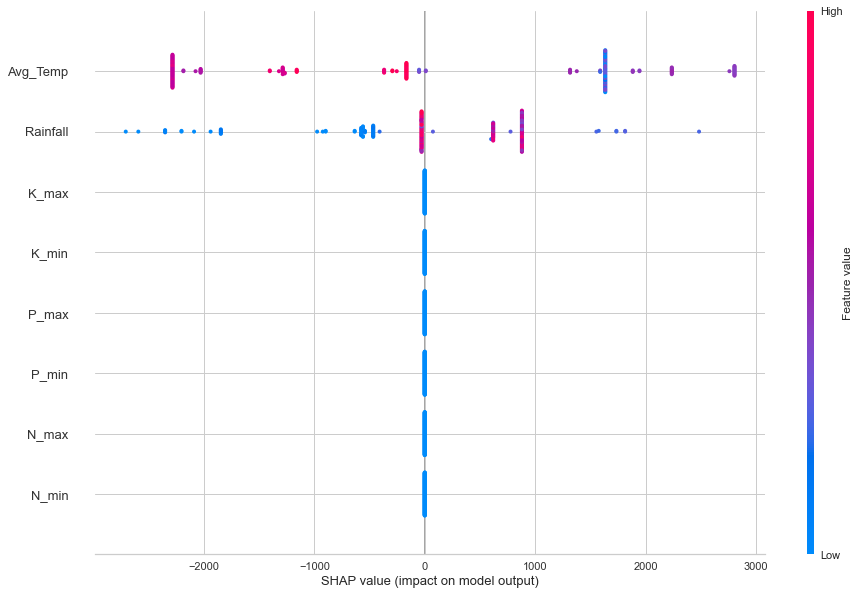

In [ ]:
import shap
explainer = shap.Explainer(maize_booster, X_test_Tapioca[[*features]])
shap_values = explainer(X_test_Tapioca[[*features]])
shap.plots.beeswarm(shap_values, max_display = 20, plot_size=[15,10])


In [ ]:
tobacco_booster = XGBRegressor(
 use_label_encoder = False,
 objective= 'reg:squarederror',
 nthread=8,
 learning_rate = 0.1,
 n_estimators = 62,
 max_depth = 3,
 colsample_bytree=1,
 eval_metric = 'rmse',
 seed=7)
tobacco_booster.fit(X_train_Tobacco[features], X_train_Tobacco['Productivity'])
mae = mean_absolute_error(X_test_Tobacco['Productivity'], tobacco_booster.predict(X_test_Tobacco[features]))
r2 = r2_score(X_test_Tobacco['Productivity'],  tobacco_booster.predict(X_test_Tobacco[features]))

print(f"R2 score: {r2}, MAE: {mae}", X_test_Tobacco['Productivity'].min(), X_test_Tobacco['Productivity'].max())

R2 score: 0.12172120733712888, MAE: 1264.7667619934414 51.282051282051285 8000.0


In [ ]:
cluster2_test['Crop'].unique()

array(['Brinjal', 'Cardamom', 'Cashewnut', 'Drum Stick', 'Dry chillies',
       'Dry ginger', 'Maize', 'Peas & beans (Pulses)', 'Rice',
       'Sunflower', 'Tapioca', 'Tobacco'], dtype=object)

In [ ]:
features.append('encoded_crops')

In [ ]:
y_pred_c3 = booster_c3.predict(cluster3_test[features])
r2 = r2_score(cluster3_test['Production'], y_pred_c3)
mae = mean_absolute_error(cluster3_test['Production'], y_pred_c3)
print(r2, mae)

-0.026041118081380876 45257.584016954395


In [ ]:
y_pred_c4 = booster_c4.predict(cluster4_test[features])
r2 = r2_score(cluster4_test['Production'], y_pred_c4)
mae = mean_absolute_error(cluster4_test['Production'], y_pred_c4)
print(r2, mae)

0.01881560624269707 5747.918015908959


# Demo

In [ ]:
demo_obs1 = pd.DataFrame(index = range(0,1), data = { 'Crop':'Tapioca', 'N_min': 45, 'N_max':90, 'P_min': 90, 'P_max': 90, 'K_min': 120, 'K_max':240, 'Avg_Temp':26.95958333333333, 'Rainfall': 1112.2200000000005, 'Productivity': 3220.0, 'EUR/ha':2204.370251412,'EUR/kg':0.6845870346,'Area':200.0,'Production':644.0,'Production_kg': 644000.0, 'encoded_crops':10 })
demo_obs2 = pd.DataFrame(index = range(0,1), data = { 'Crop':'Cashewnut', 'N_min': 60, 'N_max':120, 'P_min': 72, 'P_max': 144, 'K_min': 24, 'K_max':48, 'Avg_Temp':27.01125, 'Rainfall': 1163.31, 'Productivity': 421.4062748002751, 'EUR/ha':3029.137356160785,'EUR/kg':7.188163863,'Area':18901.0,'Production':7965.0,'Production_kg': 7965000.0,'encoded_crops':2})
demo_obs3 = pd.DataFrame(index = range(0,1), data = { 'Crop':'Brinjal', 'N_min': 100, 'N_max':200, 'P_min': 50, 'P_max': 75, 'K_min': 50, 'K_max':75, 'Avg_Temp':28.891666666666666, 'Rainfall': 824.46, 'Productivity': 11181.159420289856, 'EUR/ha':4465.111450265942,'EUR/kg':0.3993424369,'Area':276.0,'Production':3086,'Production_kg': 3086000.0, 'encoded_crops':0})
# demo_obs3 = pd.DataFrame(index = range(0,1), data = { 'Crop':'Brinjal', 'N_min': 100, 'N_max':200, 'P_min': 50, 'P_max': 75, 'K_min': 50, 'K_max':75, 'Avg_Temp':39, 'Rainfall': 824.46, 'Productivity': 11181.159420289856, 'EUR/ha':4465.111450265942,'EUR/kg':0.3993424369,'Area':276.0,'Production':3086,'Production_kg': 3086000.0, 'encoded_crops':0})

In [ ]:
features

['N_min',
 'N_max',
 'P_min',
 'P_max',
 'K_min',
 'K_max',
 'Avg_Temp',
 'Rainfall',
 'encoded_crops']

In [ ]:
features.remove('encoded_crops')

In [ ]:
KM.predict(demo_obs1[features])

array([3])

In [ ]:
KM.predict(demo_obs2[features])

array([3])

In [ ]:
KM.predict(demo_obs3[features])

array([3])

In [ ]:
features.append('encoded_crops')
features

['N_min',
 'N_max',
 'P_min',
 'P_max',
 'K_min',
 'K_max',
 'Avg_Temp',
 'Rainfall',
 'encoded_crops']

In [ ]:
y_pred1 = booster_c2.predict(demo_obs1[features])
y_pred1

array([21935.346], dtype=float32)

# Analysis on clusters

## Cluster 0

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

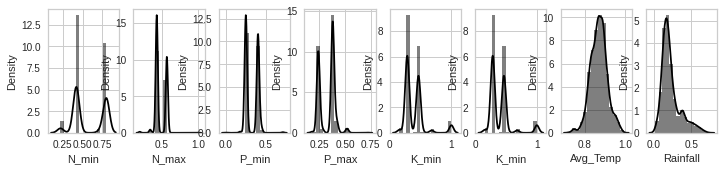

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(2, 8, 1)
sns.distplot(cluster0_df['N_min'], color="black",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 2)
sns.distplot(cluster0_df['N_max'], color="black",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 3)
sns.distplot(cluster0_df['P_min'], color="black",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 4)
sns.distplot(cluster0_df['P_max'], color="black",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 5)
sns.distplot(cluster0_df['K_min'], color="black",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 6)
sns.distplot(cluster0_df['K_min'], color="black",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 7)
sns.distplot(cluster0_df['Avg_Temp'],color="black",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 8)
sns.distplot(cluster0_df['Rainfall'],color="black",bins=15,hist_kws={'alpha':0.5})

After standardization makes no sense

In [ ]:

print("The distribution of Avg Temp have Mean and Std for Cluster 0 are:  {} +- {}".format(cluster0_df.Avg_Temp.mean(), cluster0_df.Avg_Temp.std()))
print("The distribution of Rainfall have Mean and Std for Cluster 0 are:  {} +- {}".format(cluster0_df.Rainfall.mean(), cluster0_df.Rainfall.std()))

The distribution of Avg Temp have Mean and Std for Cluster 0 are:  0.8691961063202377 +- 0.04069951000237507
The distribution of Rainfall have Mean and Std for Cluster 0 are:  0.2244471756542933 +- 0.1252764583112394


In [ ]:
'''
km_cluster0_distribution = KM_data.query("KM_Clusters == 0")["Crop"].value_counts()
print("The distribution for KM cluster 0 is:\n{}".format(km_cluster0_distribution))
'''

'\nkm_cluster0_distribution = KM_data.query("KM_Clusters == 0")["Crop"].value_counts()\nprint("The distribution for KM cluster 0 is:\n{}".format(km_cluster0_distribution))\n'

In [ ]:
'''
distribution0_df = pd.DataFrame(km_cluster0_distribution).reset_index()
distribution0_df = distribution0_df.rename(columns={"index":"Crop", "Crop":"Presence"})
distribution0_df
'''

'\ndistribution0_df = pd.DataFrame(km_cluster0_distribution).reset_index()\ndistribution0_df = distribution0_df.rename(columns={"index":"Crop", "Crop":"Presence"})\ndistribution0_df\n'

In [ ]:
'''
total = KM_data["Crop"].value_counts()
total_df = pd.DataFrame(total).reset_index()
total_df = total_df.rename(columns = {"index":"Crop", "Crop":"Total_presence"})
total_df
'''

'\ntotal = KM_data["Crop"].value_counts()\ntotal_df = pd.DataFrame(total).reset_index()\ntotal_df = total_df.rename(columns = {"index":"Crop", "Crop":"Total_presence"})\ntotal_df\n'

In [ ]:
'''
merge0 = pd.merge(distribution0_df, total_df, on = "Crop")
merge0
'''

'\nmerge0 = pd.merge(distribution0_df, total_df, on = "Crop")\nmerge0\n'

## Cluster 1

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

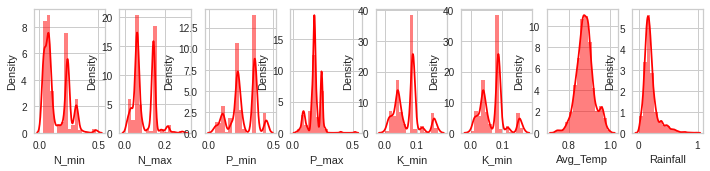

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(2, 8, 1)
sns.distplot(cluster1_df['N_min'], color="red",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 2)
sns.distplot(cluster1_df['N_max'], color="red",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 3)
sns.distplot(cluster1_df['P_min'], color="red",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 4)
sns.distplot(cluster1_df['P_max'], color="red",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 5)
sns.distplot(cluster1_df['K_min'], color="red",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 6)
sns.distplot(cluster1_df['K_min'], color="red",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 7)
sns.distplot(cluster1_df['Avg_Temp'],color="red",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 8)
sns.distplot(cluster1_df['Rainfall'],color="red",bins=15,hist_kws={'alpha':0.5})

In [ ]:
print("The distribution of Avg Temp have Mean and Std for Cluster 1 are:  {} +- {}".format(cluster1_df.Avg_Temp.mean(), cluster1_df.Avg_Temp.std()))
print("The distribution of Rainfall have Mean and Std for Cluster 1 are:  {} +- {}".format(cluster1_df.Rainfall.mean(), cluster1_df.Rainfall.std()))

The distribution of Avg Temp have Mean and Std for Cluster 1 are:  0.8780522814737503 +- 0.040890696440393254
The distribution of Rainfall have Mean and Std for Cluster 1 are:  0.20272743091671452 +- 0.11935829828766263


In [ ]:
'''
km_cluster1_distribution = KM_data.query("KM_Clusters == 1")["Crop"].value_counts()
print("The distribution for KM cluster 1 is:\n{}".format(km_cluster1_distribution))
'''

'\nkm_cluster1_distribution = KM_data.query("KM_Clusters == 1")["Crop"].value_counts()\nprint("The distribution for KM cluster 1 is:\n{}".format(km_cluster1_distribution))\n'

In [ ]:
'''
distribution1_df = pd.DataFrame(km_cluster1_distribution).reset_index()
distribution1_df = distribution1_df.rename(columns={"index":"Crop", "Crop":"Presence"})
distribution1_df
'''

'\ndistribution1_df = pd.DataFrame(km_cluster1_distribution).reset_index()\ndistribution1_df = distribution1_df.rename(columns={"index":"Crop", "Crop":"Presence"})\ndistribution1_df\n'

In [ ]:

'''merge1 = pd.merge(distribution1_df, total_df, on = "Crop")
merge1'''

'merge1 = pd.merge(distribution1_df, total_df, on = "Crop")\nmerge1'

## Cluster 2

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

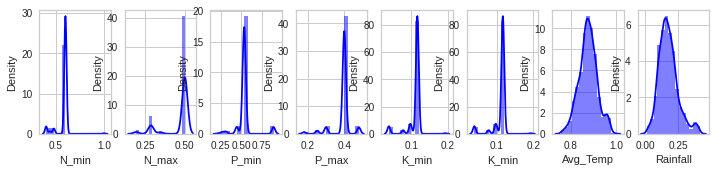

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(2, 8, 1)
sns.distplot(cluster2_df['N_min'], color="blue",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 2)
sns.distplot(cluster2_df['N_max'], color="blue",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 3)
sns.distplot(cluster2_df['P_min'], color="blue",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 4)
sns.distplot(cluster2_df['P_max'], color="blue",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 5)
sns.distplot(cluster2_df['K_min'], color="blue",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 6)
sns.distplot(cluster2_df['K_min'], color="blue",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 7)
sns.distplot(cluster2_df['Avg_Temp'],color="blue",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 8)
sns.distplot(cluster2_df['Rainfall'],color="blue",bins=15,hist_kws={'alpha':0.5})

In [ ]:
print("The distribution of Avg Temp have Mean and Std for Cluster 2 are:  {} +- {}".format(cluster2_df.Avg_Temp.mean(), cluster2_df.Avg_Temp.std()))
print("The distribution of Rainfall have Mean and Std for Cluster 2 are:  {} +- {}".format(cluster2_df.Rainfall.mean(), cluster2_df.Rainfall.std()))

The distribution of Avg Temp have Mean and Std for Cluster 2 are:  0.8760970156045739 +- 0.040124392606472735
The distribution of Rainfall have Mean and Std for Cluster 2 are:  0.1751508947250657 +- 0.07046801520619626


In [ ]:
'''
km_cluster2_distribution = KM_data.query("KM_Clusters == 2")["Crop"].value_counts()
print("The distribution for KM cluster 2 is:\n{}".format(km_cluster2_distribution))
'''

'\nkm_cluster2_distribution = KM_data.query("KM_Clusters == 2")["Crop"].value_counts()\nprint("The distribution for KM cluster 2 is:\n{}".format(km_cluster2_distribution))\n'

In [ ]:
'''
distribution2_df = pd.DataFrame(km_cluster2_distribution).reset_index()
distribution2_df = distribution2_df.rename(columns={"index":"Crop", "Crop":"Presence"})
distribution2_df
'''

'\ndistribution2_df = pd.DataFrame(km_cluster2_distribution).reset_index()\ndistribution2_df = distribution2_df.rename(columns={"index":"Crop", "Crop":"Presence"})\ndistribution2_df\n'

In [ ]:
'''
merge2 = pd.merge(distribution2_df, total_df, on = "Crop")
merge2
'''

'\nmerge2 = pd.merge(distribution2_df, total_df, on = "Crop")\nmerge2\n'

## Cluster 3

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

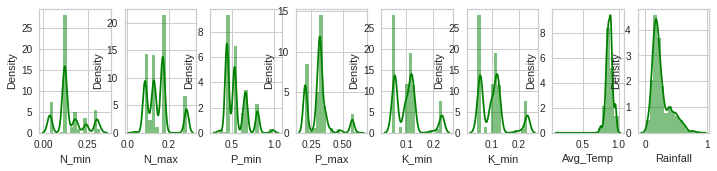

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(2, 8, 1)
sns.distplot(cluster3_df['N_min'], color="green",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 2)
sns.distplot(cluster3_df['N_max'], color="green",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 3)
sns.distplot(cluster3_df['P_min'], color="green",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 4)
sns.distplot(cluster3_df['P_max'], color="green",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 5)
sns.distplot(cluster3_df['K_min'], color="green",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 6)
sns.distplot(cluster3_df['K_min'], color="green",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 7)
sns.distplot(cluster3_df['Avg_Temp'],color="green",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 8)
sns.distplot(cluster3_df['Rainfall'],color="green",bins=15,hist_kws={'alpha':0.5})

In [ ]:
print("The distribution of Avg Temp have Mean and Std for Cluster 3 are:  {} +- {}".format(cluster3_df.Avg_Temp.mean(), cluster3_df.Avg_Temp.std()))
print("The distribution of Rainfall have Mean and Std for Cluster 3 are:  {} +- {}".format(cluster3_df.Rainfall.mean(), cluster3_df.Rainfall.std()))

The distribution of Avg Temp have Mean and Std for Cluster 3 are:  0.8707845674006137 +- 0.04743079854657958
The distribution of Rainfall have Mean and Std for Cluster 3 are:  0.25463168792547713 +- 0.1474955570606321


In [ ]:
'''
km_cluster3_distribution = KM_data.query("KM_Clusters == 3")["Crop"].value_counts()
print("The distribution for KM cluster 3 is:\n{}".format(km_cluster3_distribution))
'''

'\nkm_cluster3_distribution = KM_data.query("KM_Clusters == 3")["Crop"].value_counts()\nprint("The distribution for KM cluster 3 is:\n{}".format(km_cluster3_distribution))\n'

In [ ]:
'''
distribution3_df = pd.DataFrame(km_cluster3_distribution).reset_index()
distribution3_df = distribution3_df.rename(columns={"index":"Crop", "Crop":"Presence"})
distribution3_df
'''

'\ndistribution3_df = pd.DataFrame(km_cluster3_distribution).reset_index()\ndistribution3_df = distribution3_df.rename(columns={"index":"Crop", "Crop":"Presence"})\ndistribution3_df\n'

In [ ]:
'''
merge3 = pd.merge(distribution3_df, total_df, on = "Crop")
merge3
'''

'\nmerge3 = pd.merge(distribution3_df, total_df, on = "Crop")\nmerge3\n'

## Cluster 4

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

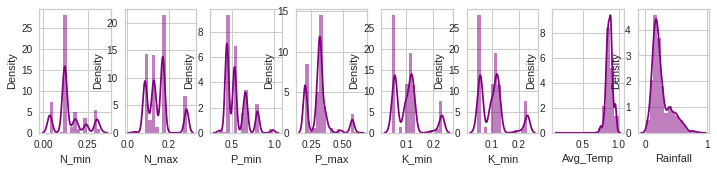

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(2, 8, 1)
sns.distplot(cluster3_df['N_min'], color="purple",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 2)
sns.distplot(cluster3_df['N_max'], color="purple",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 3)
sns.distplot(cluster3_df['P_min'], color="purple",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 4)
sns.distplot(cluster3_df['P_max'], color="purple",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 5)
sns.distplot(cluster3_df['K_min'], color="purple",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 6)
sns.distplot(cluster3_df['K_min'], color="purple",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 7)
sns.distplot(cluster3_df['Avg_Temp'],color="purple",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 8, 8)
sns.distplot(cluster3_df['Rainfall'],color="purple",bins=15,hist_kws={'alpha':0.5})

In [ ]:
print("The distribution of Avg Temp have Mean and Std for Cluster 4 are:  {} +- {}".format(cluster4_df.Avg_Temp.mean(), cluster4_df.Avg_Temp.std()))
print("The distribution of Rainfall have Mean and Std for Cluster 4 are:  {} +- {}".format(cluster4_df.Rainfall.mean(), cluster4_df.Rainfall.std()))

The distribution of Avg Temp have Mean and Std for Cluster 4 are:  0.8757883275171295 +- 0.03119062280479096
The distribution of Rainfall have Mean and Std for Cluster 4 are:  0.16984257845662487 +- 0.07420085662096175


In [ ]:
'''
km_cluster4_distribution = KM_data.query("KM_Clusters == 4")["Crop"].value_counts()
print("The distribution for KM cluster 4 is:\n{}".format(km_cluster4_distribution))
'''

'\nkm_cluster4_distribution = KM_data.query("KM_Clusters == 4")["Crop"].value_counts()\nprint("The distribution for KM cluster 4 is:\n{}".format(km_cluster4_distribution))\n'

In [ ]:
'''
distribution4_df = pd.DataFrame(km_cluster4_distribution).reset_index()
distribution4_df = distribution4_df.rename(columns={"index":"Crop", "Crop":"Presence"})
distribution4_df
'''

'\ndistribution4_df = pd.DataFrame(km_cluster4_distribution).reset_index()\ndistribution4_df = distribution4_df.rename(columns={"index":"Crop", "Crop":"Presence"})\ndistribution4_df\n'

In [ ]:
'''
merge4 = pd.merge(distribution4_df, total_df, on = "Crop")
merge4
'''

'\nmerge4 = pd.merge(distribution4_df, total_df, on = "Crop")\nmerge4\n'